# Banknote Authenification Using Random Forest
This notebook contains an example of binary classification using Random forest. You will find the dataset [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt).
A brief description of the data: "Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images." If you are interested in reading more about the dataset, click [here](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

Basically, our job here is to write a model that identifies a forged banknote correctly. And good for us, all the features we need to make the classification have been preprocessed and kept somewhere accessible. This is not often the case. Usually, we would go through data gathering, data accessing (to check the data for anomalies), data cleaning and so on.

With such a luck on our side, let's get started.

## Import Packages
It is common practice to import all the packages you'll need.

In [125]:
import pandas as pd                # for data manipulation
import matplotlib.pyplot as plt    # for data visualization

from sklearn.ensemble import RandomForestClassifier  # tree based classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Get Data

In [127]:
# data source
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
# read data from source
data = pd.read_csv(url, delimiter=',', header=None)

In [128]:
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


While the column names above are not descriptive enough, we found sufficient information about each column in the documentray. I will just copy and paste it here.

**Attribute Information:**
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer)

The variable of interest here is the class. It holds zeroes and ones representing genuine and forged banknote respectively. We will also use the information above to rename the columns to make them more descriptive.

In [132]:
# rename columns
data.rename(columns={0:'variance', 1:'skewness', 2:'curtosis', 3:'entropy', 4:'class'}, inplace=True)
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Good. The columns are more descriptive now.

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


This data is pretty clean. There are no missing or null values in data. And there is one more thing I think is worth checking. Is the data balanced? I mean, it is expected to have more genuine than forged banknotes in circulation.

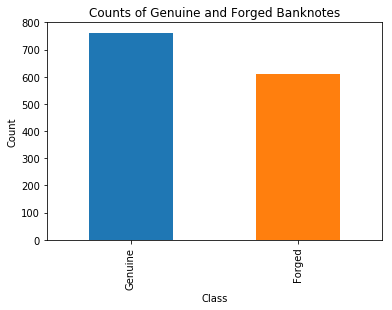

In [141]:
data['class'].value_counts().plot.bar()
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Counts of Genuine and Forged Banknotes')
plt.xticks([0,1], ['Genuine', 'Forged']);

There doesn't seem to be much a difference here. We will go on to fit the model for now.

Let's separate features from labels.

In [142]:
features = data.drop(['class'], axis=1)
labels = data['class']

The next step is be to split the above features and labels into training and testing sets. We will use the training set to train the model and the testing set to, you guessed correctly, test the model.

In [143]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels,
                                                                            test_size=0.2, random_state = 20)

Fit the model

In [144]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Make predictions using the test set

In [145]:
y_pred = rf_clf.predict(test_features)

And now is the moment of truth. We want to know how well the model has performed.

In [146]:
print(f'Accuracy Score: {accuracy_score(test_labels, y_pred)}')
print('==================================')
print(classification_report(test_labels, y_pred))
print('==================================')
print(pd.crosstab(test_labels, y_pred, rownames=['Actual Result'], colnames=['Predicted Result']))

Accuracy Score: 0.9963636363636363
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       154
           1       0.99      1.00      1.00       121

   micro avg       1.00      1.00      1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Predicted Result    0    1
Actual Result             
0                 153    1
1                   0  121


Seems out model did a quite good job at correctly classifying all forged banknotes, with accuracy score of 99.64%. With f1-score of 1.0, we are confident the model is doing fine. The model did misclassify a genuine banknote as forged but that cost is more bearable than to misclassify a forged banknote as genuine. We know that our models won't be absolutely correct always, so the goal is to minimize error - I am sure we acheived that here.

As a plus, we can choose the investigate the importance of all four features, based on their contribution to the model.

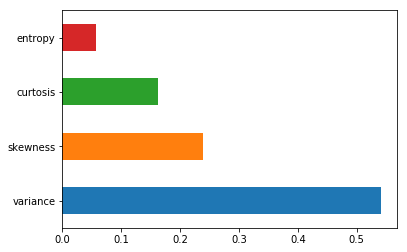

In [152]:
feat_importances = pd.Series(rf_clf.feature_importances_, index=features.columns)
feat_importances.plot.barh();

With this, our work here is done. But you can go on to tweak the parameters of the model a bit to see if you can arrive at an accuracy of 100%. DO keep in mind that this was a very simple problem to solve because we were handed a cleaned and preprocessed data. I will be taking a more tasking problem in the next project.